## Prepare Datasets

We are using the dataset from link : https://drive.google.com/file/d/1RCHGfn9JJyyReAh8PIIoF8Ch0H3miP0u/view?usp=drive_link. which include "data_preprocessed.tsv".

In [1]:
import pandas as pd
import requests
from io import StringIO

In [2]:
file_link = 'https://drive.google.com/file/d/1RCHGfn9JJyyReAh8PIIoF8Ch0H3miP0u/view?usp=drive_link'
file_link = 'https://drive.google.com/uc?id=' + file_link.split('/')[-2]

direct_download_link = file_link.replace('open', 'uc')

response = requests.get(direct_download_link)

csv_from_drive = StringIO(response.text)

In [3]:
df = pd.read_csv(csv_from_drive,
                 sep="\t",
                 names=["text", "sentiment"])

In [4]:
df

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11000 non-null  object
 1   sentiment  11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [6]:
df.duplicated().sum()

67

In [7]:
df.head(3)

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive


In [8]:
df['sentiment'].value_counts()

positive    6416
negative    3436
neutral     1148
Name: sentiment, dtype: int64

## Text Normalization/Cleansing

In [9]:
import re

def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]',' ',string)
    return string

In [10]:
df['text_clean'] = df['text'].apply(cleansing)

In [11]:
df.head(3)

,text,sentiment,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...


In [12]:
data_preprocessed = df['text_clean'].tolist()

## Vectorization, where text 'transformed' into vector / numerical

### Feature Extraction

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

x = count_vect.transform(data_preprocessed)

In [15]:
# Import the countvectorizer object that contains the vectorization process of the entire training data
# So that, before the prediction is performed on the new data later, the new text data can be converted into a vector/vectorization

import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

In [16]:
# how to open feature.p (pickle dump result)

file = open("feature.p",'rb')
count_vect_import = pickle.load(file)
file.close()

## Prepare train & test datasets/Splitting Dataset

### Before modeling, we need to split the existing data into 'data train' and 'data test'

In [17]:
from sklearn.model_selection import train_test_split

classes = df['sentiment']

In [18]:
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: sentiment, Length: 11000, dtype: object

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, classes, test_size = 0.2)

### Modeling using algorithm machine learning MLPClassifier (Basic Neural Network)

In [20]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [24]:
# dump model into the pickle file

pickle.dump(model, open("model.p","wb"))

In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.80      0.79       693
     neutral       0.79      0.69      0.74       219
    positive       0.89      0.90      0.89      1288

    accuracy                           0.85      2200
   macro avg       0.82      0.80      0.81      2200
weighted avg       0.85      0.85      0.85      2200



The result shows that the F1 Score for Negative is in 0.79, 0.74 for Neutral, and 0.89 for Positive.
This shows that the model is good enough, but have a weak tendency towards defining 'neural' sentiment

## Cross Validation

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, random_state=42, shuffle=True)

The validation training shows that the model have an average accuracy of 84.3% which is indicates a good model

Training ke- 1
Training Accuracy: 0.9998863636363636
Validation Accuracy: 0.8313636363636364
              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       680
     neutral       0.76      0.62      0.68       239
    positive       0.87      0.90      0.88      1281

    accuracy                           0.83      2200
   macro avg       0.80      0.77      0.78      2200
weighted avg       0.83      0.83      0.83      2200

Training ke- 2
Training Accuracy: 1.0
Validation Accuracy: 0.8395454545454546
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78       706
     neutral       0.75      0.70      0.72       220
    positive       0.88      0.90      0.89      1274

    accuracy                           0.84      2200
   macro avg       0.81      0.79      0.80      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 3
Training Accuracy: 1.0
Validation Accuracy: 0.855454

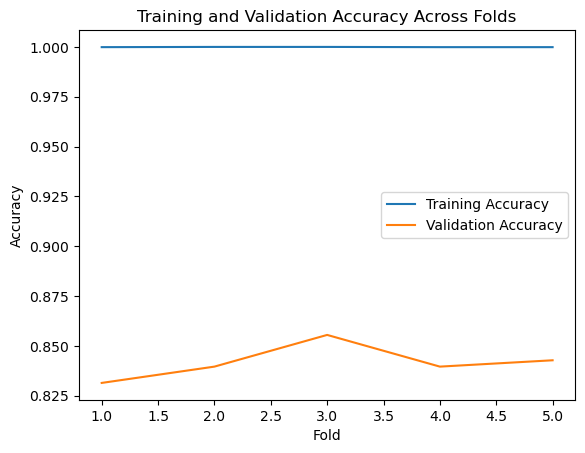

In [34]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, random_state=42, shuffle=True)

train_accuracies = []
val_accuracies = []

y = classes

# Ini main part cross-validation
for iteration, data in enumerate(kf.split(x), start=1):

    data_train = x[data[0]]
    target_train = y[data[0]]

    data_test = x[data[1]]
    target_test = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train, target_train)

    preds_train = clf.predict(data_train)
    preds_val = clf.predict(data_test)

    accuracy_train = accuracy_score(target_train, preds_train)
    accuracy_val = accuracy_score(target_test, preds_val)

    print("Training ke-", iteration)
    print("Training Accuracy:", accuracy_train)
    print("Validation Accuracy:", accuracy_val)
    print(classification_report(target_test, preds_val))
    print("============================================")

    train_accuracies.append(accuracy_train)
    val_accuracies.append(accuracy_val)

average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)

print()
print("Rata-rata Training Accuracy: ", average_train_accuracy)
print("Rata-rata Validation Accuracy: ", average_val_accuracy)

# Plotting
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Across Folds')
plt.legend()
plt.show()

The validation training shows that the model have an average accuracy of 84.1% which is indicates a good model. However, it is clearly underfitting

## Testing

In [36]:
original_text = """
bajingan
"""

text = count_vect.transform([cleansing(original_text)])

result = model.predict(text)[0]
print('Sentiment:')
print()
print(result)

Sentiment:

negative
